In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pandas as pd
from pprint import pprint
import string
import os
import re

In [2]:
tweets = pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\Twitter-Data-Analysis\data\cleaned.csv')
tweets.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,text
0,0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth:🚨Africa is ""in the midst o...",0.000000,0.000000,en,548,612.0,ketuesriche,551,351,NaN,NaN,NaN,Mass,rt africa is in the midst of a full blown ...
1,1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,NaN,NaN,"Edinburgh, Scotland",dr moeti is head of who in africa and one of ...
2,2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,NaN,NaN,NaN,thank you 2note for creating this amazing cam...
3,3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,1580,899.0,RIPNY08,2666,2704,NaN,NaN,NaN,NaN,former pfizer vp and virologist dr michael y...
4,4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,72,20.0,pash22,28250,30819,NaN,NaN,NaN,United Kingdom,i think it s important that we don t sell cova...


In [ ]:
#function to extract hashtags and append in hastags columns


In [7]:
def create_wordcloud(msgs):
    stopwords = set(STOPWORDS)
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=5000,
                      colormap='tab20c',
                      stopwords=stopwords,
                      collocations=True).generate_from_text(msgs)
    plt.figure(figsize=(20,12))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(); plt.title('most used words', size=20)
    plt.savefig('masked_wordcloud.jpg')
    plt.show()

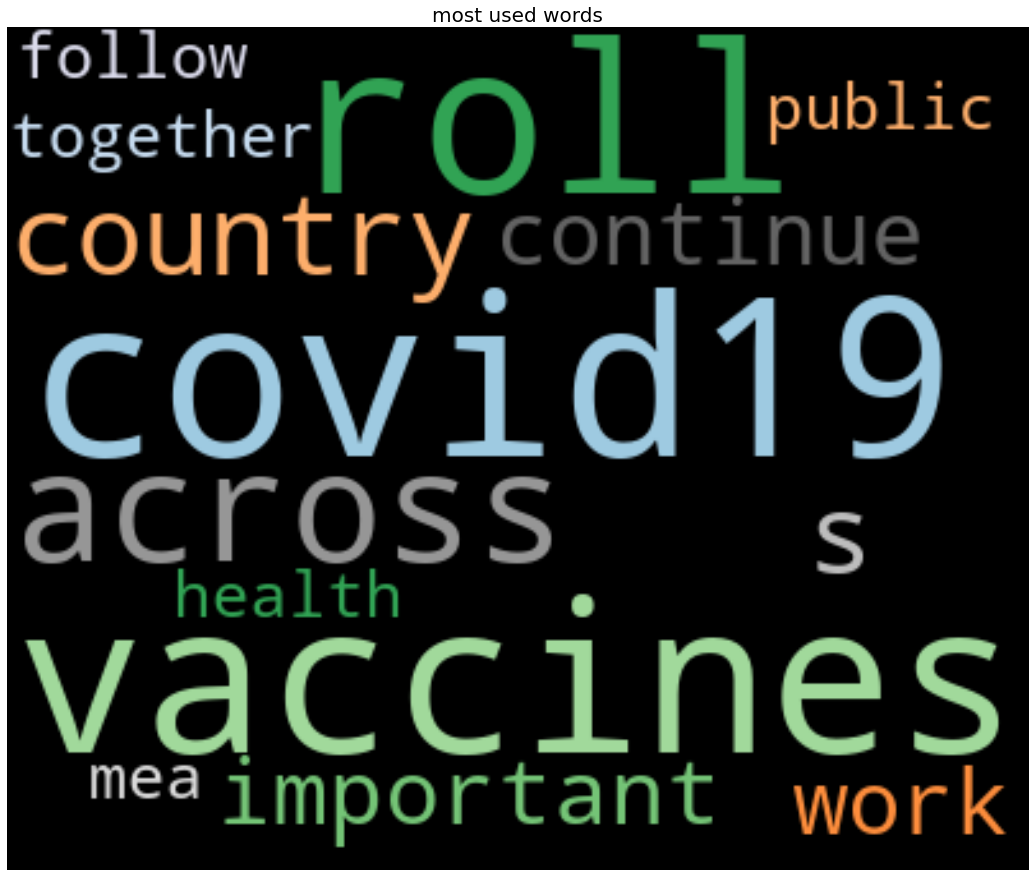

In [18]:
create_wordcloud(tweets.text[1500])

In [23]:
class PrepareData:
    def __init__(self,df):
        self.df=df
    
    def preprocess_data(self):
        

        #Converting tweets to list of words For feature engineering
        sentence_list = [tweet for tweet in tweets['text']]
        word_list = [sent.split() for sent in sentence_list]

        #Create dictionary which contains Id and word 
        word_to_id = corpora.Dictionary(word_list)
        corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]




        return word_list, word_to_id, corpus_1

In [26]:
PrepareData_obj=PrepareData(tweets)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

word_list[:2]

[['rt',
  'africa',
  'is',
  'in',
  'the',
  'midst',
  'of',
  'a',
  'full',
  'blown',
  'third',
  'wave',
  'of',
  'coronavirus',
  'the',
  'head',
  'of',
  'has',
  'warned',
  'cases',
  'have',
  'risen'],
 ['dr',
  'moeti',
  'is',
  'head',
  'of',
  'who',
  'in',
  'africa',
  'and',
  'one',
  'of',
  'the',
  'best',
  'public',
  'health',
  'experts',
  'and',
  'leaders',
  'i',
  'know',
  'hers',
  'is',
  'a',
  'desperate',
  're']]

In [27]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1)], [(0, 1), (1, 1), (8, 1), (9, 1), (10, 2), (12, 2), (15, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(10, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(0, 1), (10, 1), (12, 1), (15, 1), (19, 1), (22, 1), (30, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(0, 1), (6, 1), (9, 1), (10, 1), (19, 1), (26, 1), (40, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 3), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(0, 1), (15, 1), (26, 1), (46, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1),

In [30]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [31]:
pprint(lda_model.show_topics(formatted=False))

[(10,
  [('do', 0.11355804),
   ('how', 0.10180064),
   ('they', 0.07958267),
   ('are', 0.056331977),
   ('make', 0.054329906),
   ('propaganda', 0.042469155),
   ('apartheid', 0.038566064),
   ('settler', 0.035831697),
   ('occupation', 0.035831697),
   ('colonial', 0.035831697)]),
 (7,
  [('capacity', 0.07277816),
   ('18', 0.07007863),
   ('age', 0.06568623),
   ('pin', 0.06326787),
   ('code', 0.06326721),
   ('dose1', 0.06326721),
   ('limit', 0.06326721),
   ('min', 0.06326721),
   ('vaccines', 0.06192345),
   ('45', 0.05569021)]),
 (9,
  [('1', 0.12013249),
   ('south', 0.08418356),
   ('all', 0.064521626),
   ('africa', 0.049362008),
   ('of', 0.04248672),
   ('covid19', 0.034190405),
   ('virus', 0.032427188),
   ('use', 0.031239348),
   ('pandemic', 0.03083152),
   ('number', 0.03050827)]),
 (13,
  [('on', 0.11749852),
   ('being', 0.075332075),
   ('government', 0.06506562),
   ('against', 0.05136779),
   ('committed', 0.048253443),
   ('coverage', 0.04748253),
   ('providi

In [32]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -7.747010850669849

 Ldamodel Coherence Score/Accuracy on Tweets:  0.425838297216051


In [34]:
# Visualize the topics
pyLDAvis.enable_notebook()
gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')

C:\Users\Jakinda\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.220577 -0.063140       1        1  15.366225
6     -0.000207 -0.309940       2        1  14.938197
3     -0.403746  0.048612       3        1   9.796071
1      0.333917 -0.248340       4        1   9.030220
7      0.489427  0.049669       5        1   7.279669
0      0.347119  0.306313       6        1   7.136570
12     0.059388  0.153472       7        1   6.632592
14     0.143458 -0.354425       8        1   6.158328
5     -0.357223 -0.258379       9        1   5.155086
2     -0.097364  0.085829      10        1   4.703801
4     -0.131025  0.441929      11        1   4.554128
13    -0.344410  0.280219      12        1   2.671751
9      0.245949 -0.065284      13        1   2.631783
11    -0.167784 -0.470771      14        1   2.591929
10     0.103077  0.404238      15        1   1.353651, topic_info=          Term         Freq        Total Category  logprob  loglift
48         you  1602.000000  1602.000000  Default  30.0000  30.0000
216         by  1025.000000  1025.000000  Default  29.0000  29.0000
91          to  3979.000000  3979.000000  Default  28.0000  28.0000
623       just   946.000000   946.000000  Default  27.0000  27.0000
12          of  3063.000000  3063.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
80         are    92.308337  1721.238585  Topic15  -2.8765   1.3767
2589  children     0.075376     1.174549  Topic15  -9.9869   1.5562
2994     fresh     0.075349     1.179842  Topic15  -9.9872   1.5514
1095    return     0.075345     1.180151  Topic15  -9.9873   1.5510
611     taking     0.075345     1.183209  Topic15  -9.9873   1.5485

[598 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
547      11  0.998499      0
312      11  0.985677    000
398      13  0.997926      1
313       9  0.994233     10
355       7  0.987697     14
...     ...       ...    ...
48        6  0.926048    you
48        7  0.073011    you
793      10  0.993135  young
423       6  0.999014   your
2246      1  0.993154  zweli

[556 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 4, 2, 8, 1, 13, 15, 6, 3, 5, 14, 10, 12, 11])